In [11]:
from __future__ import division
import math
from math import sqrt, log, pi, cos, sin, tan
import numpy as np
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt
import random
plt.rc('font', serif='Myriad Pro')
plt.rc('font', size=14)
import scipy.integrate
pd.options.mode.chained_assignment = None  # default='warn'

label_list = ['Aluminum','Raw Dyneema', 'Dyneema Window']

fnames_aluminum = ['aluminum0','aluminum1','aluminum2','aluminum3','aluminum4','aluminum5','aluminum6','aluminum7']
fnames_raw = ['raw0','raw1','raw2','raw3','raw4','raw5','raw6','raw7']
fnames_window = ['window0','window1','window2','window3','window4','window5','window6','window7']
fnames_list = [fnames_aluminum, fnames_raw, fnames_window]

colors = ['c', 'm', 'b', 'g', 'k']

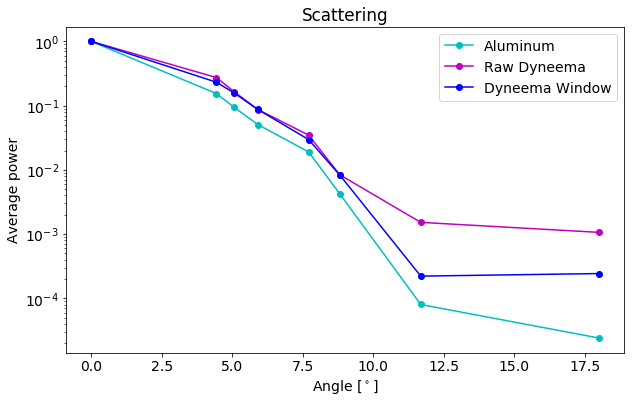

In [20]:
avgarr_aluminum = []
avgarr_aluminum1 = []
df_AL_cal = pd.read_csv(fnames_aluminum[0]+'.S1P', index_col=None, skiprows=14, delim_whitespace=True, 
                     header=None, names=['Freq', 'Power', 'Phase'])
for i in np.arange(len(fnames_aluminum)):
    df = pd.read_csv(fnames_aluminum[i]+'.S1P', index_col=None, skiprows=14, delim_whitespace=True, 
                     header=None, names=['Freq', 'Power', 'Phase'])
    avgarr_aluminum.append(np.mean((df.Power[2:-2]/df_AL_cal.Power[2:-2])**2))
    avgarr_aluminum1.append(np.mean((df.Power[2:-2]/df_AL_cal.Power[2:-2])**2))

avgarr_raw = []
avgarr_raw1 = []
df_raw_cal = pd.read_csv(fnames_raw[0]+'.S1P', index_col=None, skiprows=14, delim_whitespace=True, 
                     header=None, names=['Freq', 'Power', 'Phase'])
for i in np.arange(len(fnames_raw)):
    df = pd.read_csv(fnames_raw[i]+'.S1P', index_col=None, skiprows=14, delim_whitespace=True, 
                     header=None, names=['Freq', 'Power', 'Phase'])
    avgarr_raw.append(np.mean((df.Power[2:-2]/df_raw_cal.Power[2:-2])**2))
    avgarr_raw1.append(np.mean((df.Power[2:-2]/df_AL_cal.Power[2:-2])**2))
    
avgarr_window = []
avgarr_window1 = []
df_window_cal = pd.read_csv(fnames_window[0]+'.S1P', index_col=None, skiprows=14, delim_whitespace=True, 
                     header=None, names=['Freq', 'Power', 'Phase'])
for i in np.arange(len(fnames_window)):
    df = pd.read_csv(fnames_window[i]+'.S1P', index_col=None, skiprows=14, delim_whitespace=True, 
                     header=None, names=['Freq', 'Power', 'Phase'])
    avgarr_window.append(np.mean((df.Power[2:-2]/df_window_cal.Power[2:-2])**2))
    avgarr_window1.append(np.mean((df.Power[2:-2]/df_AL_cal.Power[2:-2])**2))
    
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111, xlabel="Angle [$^\circ$]", ylabel="Average power", title="Scattering")
angle_arr = [0.0, 4.435, 5.06, 5.904, 7.7074, 8.81, 11.686, 18]
material_list = [avgarr_aluminum, avgarr_raw, avgarr_window]
material_list1 = [avgarr_aluminum1, avgarr_raw1, avgarr_window1]

for i in np.arange(len(material_list)):
    ax1.semilogy(angle_arr, material_list[i], c=colors[i], marker='o', label=label_list[i])

plt.legend()
plt.savefig('tensionedscattering4-0.pdf', bboxes_inches='tight', dpi = 400)
plt.show()

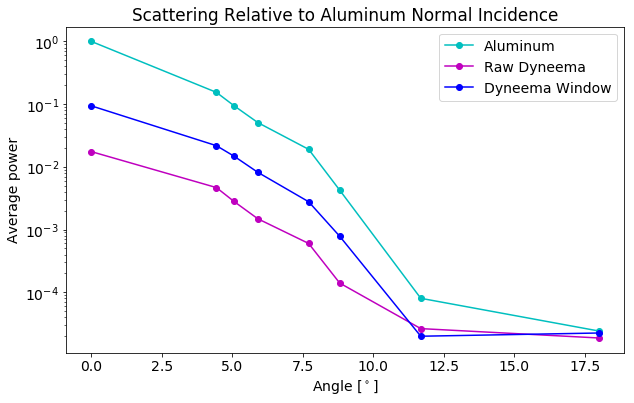

In [19]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111, xlabel="Angle [$^\circ$]", ylabel="Average power", title="Scattering Relative to Aluminum Normal Incidence")

for i in np.arange(len(material_list1)):
    ax1.semilogy(angle_arr, material_list1[i], c=colors[i], marker='o', label=label_list[i])

plt.legend()
plt.savefig('tensionedscattering4-1.pdf', bboxes_inches='tight', dpi = 400)
plt.show()